# from UTM to lat,lon

# Map with ellipses

In [45]:
from pyrocko import util, model, io, trace, moment_tensor, gmtpy,orthodrome
from pyrocko import orthodrome as od
from pyrocko.client import catalog
from pyrocko.automap import Map
import pyrocko.moment_tensor as pmt
from pyrocko.plot import mpl_color
from pyrocko.guts import load
# from seiscloud import plot as scp
# from seiscloud import cluster as scc
import numpy as np
import os
# import shutil
import matplotlib.pyplot as plt
import pygmt

In [46]:
workdir='../../clusty_flegrei/'
switch_VT=True               # CHANGE

if switch_VT:
    catdir=os.path.join(workdir,'results_VT')
else: 
    catdir=os.path.join(workdir,'results_VLP')
catname=os.path.join(catdir,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')               # CHANGE

clusty_events=model.load_events(catname,format='yaml')


In [47]:
cluster_number=[]
for ev in clusty_events:
    if not ev.extras['cluster_number'] in cluster_number:
        cluster_number.append(ev.extras['cluster_number'])

cls = {key: [] for key in cluster_number}
for ev in clusty_events:
    cls[ev.extras['cluster_number']].append(ev)

if switch_VT:
    del cls[-1]     #remove ev not clustered

In [48]:
cls_lat_mean    =[]
cls_lon_mean    =[]
cls_depth_mean  =[]
cls_mag_mean    =[]
cls_lat_std     =[]
cls_lon_std     =[]
cls_depth_std   =[]
cls_mag_std     =[]
cls_lat_all     =[]
cls_lon_all     =[]
cls_max_mag     =[]
cls_colors=[]

for key in cls:
    lat=[]
    lon=[]
    depth=[]
    mag=[]

    for ev in cls[key]:
        lat.append(ev.lat)
        lon.append(ev.lon)
        depth.append(ev.depth)
        mag.append(ev.magnitude)

    lat_mean=np.mean(lat)
    lat_std=np.std(lat)
    
    lon_mean=np.mean(lon)
    lon_std=np.std(lon)
    
    depth_mean=np.mean(depth)
    depth_std=np.std(depth)

    mag_mean=np.mean(mag)
    mag_std=np.std(mag)
    max_mag=np.max(mag)

    cls_lat_all.append(np.array(lat))
    cls_lon_all.append(np.array(lon))
 
    cls_lat_mean.append(lat_mean)
    cls_lon_mean.append(lon_mean)
    cls_depth_mean.append(depth_mean)
    cls_mag_mean.append(mag_mean)
    cls_max_mag.append(max_mag)

    cls_lat_std.append(lat_std)
    cls_lon_std.append(lon_std)
    cls_depth_std.append(depth_std)
    cls_mag_std.append(mag_std)

    cls_colors.append(cls[key][0].extras['color'])

cls_lat_mean    =np.array(cls_lat_mean    )
cls_lon_mean    =np.array(cls_lon_mean    )
cls_depth_mean  =np.array(cls_depth_mean  )
cls_mag_mean    =np.array(cls_mag_mean    )
cls_lat_std     =np.array(cls_lat_std     )
cls_lon_std     =np.array(cls_lon_std     )
cls_depth_std   =np.array(cls_depth_std   )
cls_mag_std     =np.array(cls_mag_std     )

In [49]:
for i,key in enumerate(cls):
    print(f'cluster {key} mean depth: \t\t{cls_depth_mean[i]:4.0f} +- {cls_depth_std[i]:4.0f}')
    print(f'cluster {key} mean magnitude: \t{cls_mag_mean[i]:2.2f} +- {cls_mag_std[i]:2.2f}')
    print(f'cluster {key} max magnitude: \t{cls_max_mag[i]:2.3f}')
    print(f'cluster {key} mean lat:  \t\t{cls_lat_mean[i]:2.5f} +- {cls_lat_std[i]:2.5f}')
    print(f'cluster {key} mean lon:  \t\t{cls_lon_mean[i]:2.5f} +- {cls_lon_std[i]:2.5f}\n')

cluster 0 mean depth: 		2792 +-  831
cluster 0 mean magnitude: 	2.76 +- 0.35
cluster 0 max magnitude: 	3.445
cluster 0 mean lat:  		40.82973 +- 0.00104
cluster 0 mean lon:  		14.14827 +- 0.00236

cluster 2 mean depth: 		1446 +-  181
cluster 2 mean magnitude: 	2.25 +- 0.24
cluster 2 max magnitude: 	2.545
cluster 2 mean lat:  		40.82679 +- 0.00117
cluster 2 mean lon:  		14.14189 +- 0.00103

cluster 1 mean depth: 		2784 +-  570
cluster 1 mean magnitude: 	2.87 +- 0.51
cluster 1 max magnitude: 	3.867
cluster 1 mean lat:  		40.82932 +- 0.00157
cluster 1 mean lon:  		14.13795 +- 0.00249

cluster 4 mean depth: 		3631 +-  114
cluster 4 mean magnitude: 	2.76 +- 0.25
cluster 4 max magnitude: 	3.204
cluster 4 mean lat:  		40.80532 +- 0.00292
cluster 4 mean lon:  		14.11347 +- 0.00337

cluster 3 mean depth: 		3021 +-  346
cluster 3 mean magnitude: 	2.56 +- 0.06
cluster 3 max magnitude: 	2.658
cluster 3 mean lat:  		40.83492 +- 0.00122
cluster 3 mean lon:  		14.14310 +- 0.00260

cluster 5 mean depth

In [50]:
azimuth_cls=[]
dist_cls=[]
x_cls=[]
y_cls=[]
depth_cls=[]
for i,key in enumerate(cls):
    x=[]
    y=[]
    depth=[]
    for ev in cls[key]:
        n,e = orthodrome.latlon_to_ne_numpy(cls_lat_mean[i],cls_lon_mean[i],ev.lat,ev.lon)
        x.append( e )
        y.append( n )

        depth.append(ev.depth)

    x_cls.append(x)
    y_cls.append(y)
    depth_cls.append(depth)


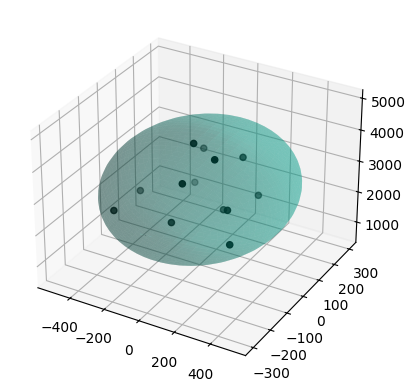

center of ellispe: [1.98434325e-02 1.24312830e-02 2.79185172e+03] 
axis: [2165.3264352   504.35211242  297.98007421] 
azimuth [[ -3.09749085  57.20747613   0.7187321 ]
 [  1.0815647   -0.66110415  57.28175546]
 [-57.20176674  -3.1103001    1.04415758]]


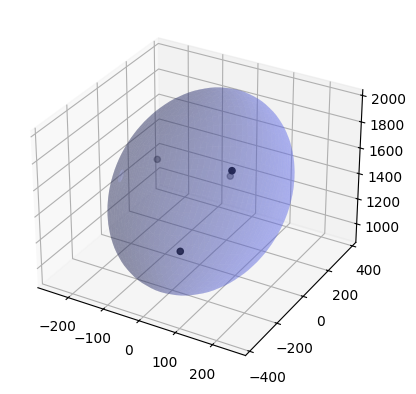

center of ellispe: [-2.91462424e-02  3.61414654e-02  1.44646470e+03] 
axis: [575.88345728 310.33943994 217.79653948] 
azimuth [[ -0.31142979 -32.4436499   47.22413517]
 [ 28.0371506   41.0979472   28.41976904]
 [ 49.96626409 -23.26316116 -15.65260794]]


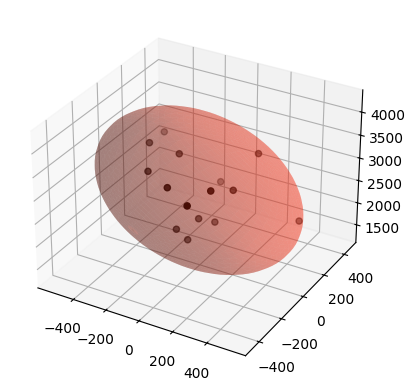

center of ellispe: [-4.40087117e-02  7.65815093e-02  2.78448268e+03] 
axis: [1491.47802204  511.87358096  438.56269602] 
azimuth [[ -7.77337348 -55.38637805  12.43905707]
 [ -3.69182115  13.02182289  55.67413165]
 [ 56.64584249  -6.75185935   5.33547318]]


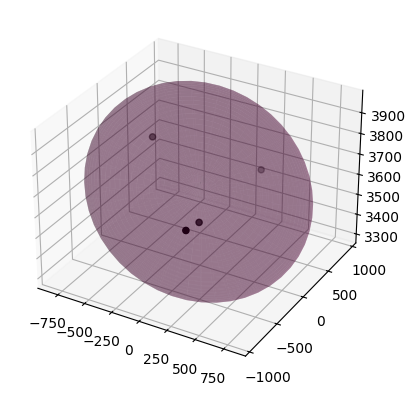

center of ellispe: [-3.37466303e-01  1.53808253e-01  3.63073246e+03] 
axis: [997.42937478 813.46829003  40.55076044] 
azimuth [[ 27.40264598 -46.98153079 -18.01768875]
 [ 50.15909654  23.87562515  14.02946572]
 [  3.99579506  22.48325238 -52.54848555]]


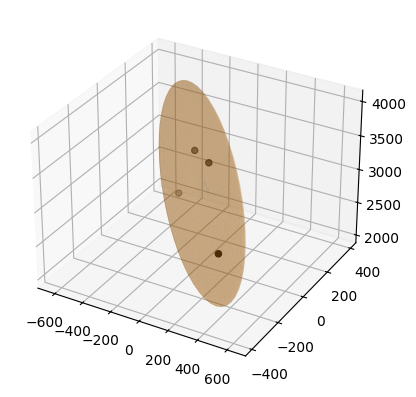

center of ellispe: [-4.27484522e-02 -7.29342350e-03  3.02071084e+03] 
axis: [1034.7312792   689.23533853   35.78944847] 
azimuth [[-14.03886526  48.06814538 -27.84187515]
 [ 13.89512438 -24.76557407 -49.7634224 ]
 [ 53.78328858  18.94534483   5.58910803]]


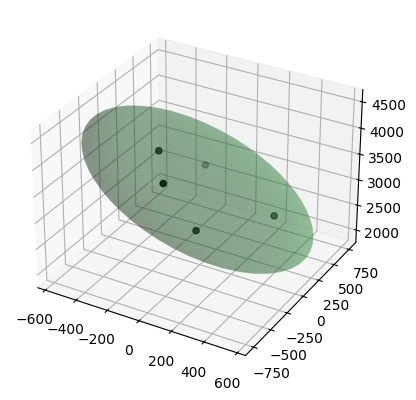

center of ellispe: [4.09771989e-02 6.85973518e-02 3.24003436e+03] 
axis: [1419.13712461  683.84316775  320.06104865] 
azimuth [[ 19.09634336   7.62730336  53.47859631]
 [ 15.10427148 -55.21332139   2.48122438]
 [-51.86518103 -13.27101107  20.41297656]]


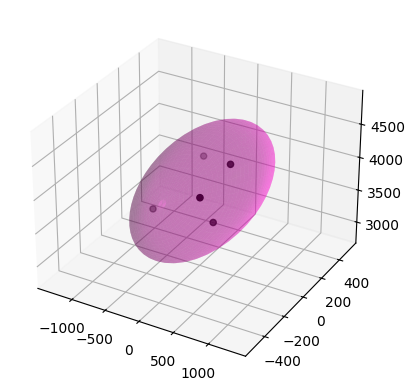

center of ellispe: [ 2.20486617e-02 -1.48592509e-02  3.83426120e+03] 
axis: [1578.00344604  685.06550844  326.54360995] 
azimuth [[-46.90218814  23.38470279  23.15484341]
 [  9.59698893 -28.84203458  48.56790293]
 [-31.47838784 -43.63598363 -19.69310493]]


In [51]:
import numpy as np
from scipy.stats import chi2

def fit_ellipsoid(points, confidence_level=0.95):
    """
    Trova l'ellissoide che meglio approssima una distribuzione di punti 3D.
    
    Parameters:
    points: numpy.ndarray di shape (n, 3) contenente le coordinate (x,y,z) dei punti
    confidence_level: livello di confidenza per la dimensione dell'ellissoide (default 0.95)
    
    Returns:
    center: centro dell'ellissoide (array 3D)
    radii: lunghezza dei semiassi dell'ellissoide
    rotation: matrice di rotazione dell'ellissoide
    """
    # Calcola il centro come media dei punti
    center = np.mean(points, axis=0)
    
    # Centra i punti sottraendo la media
    centered_points = points - center
    
    # Calcola la matrice di covarianza
    cov_matrix = np.cov(centered_points, rowvar=False)
    
    # Calcola autovalori e autovettori
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Ordina autovalori e autovettori in ordine decrescente
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Calcola i semiassi dell'ellissoide
    # Usiamo chi-square per determinare la dimensione dell'ellissoide
    chi2_val = chi2.ppf(confidence_level, df=3)
    radii = np.sqrt(eigenvalues * chi2_val)
    
    return center, radii, eigenvectors

def generate_ellipsoid_mesh(center, radii, rotation, n_points=50):
    """
    Genera i punti per visualizzare l'ellissoide.
    
    Parameters:
    center: centro dell'ellissoide
    radii: lunghezza dei semiassi
    rotation: matrice di rotazione
    n_points: numero di punti per la mesh
    
    Returns:
    X, Y, Z: coordinate dei punti della superficie dell'ellissoide
    """
    u = np.linspace(0, 2 * np.pi, n_points)
    v = np.linspace(0, np.pi, n_points)
    
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
    
    # Applica la rotazione
    for i in range(len(x)):
        for j in range(len(x)):
            point = np.array([x[i,j], y[i,j], z[i,j]])
            rotated_point = rotation.dot(point) + center
            x[i,j], y[i,j], z[i,j] = rotated_point
            
    return x, y, z

for i in range(len(x_cls)):
    points=np.zeros((len(x_cls[i]), 3))
    points[:,0]=np.array(x_cls[i]).flatten()
    points[:,1]=np.array(y_cls[i]).flatten()
    points[:,2]=np.array(depth_cls[i]).flatten()


    center, radii, eigenvectors= fit_ellipsoid(points,confidence_level=0.90)
    X,Y,Z= generate_ellipsoid_mesh(center,radii,eigenvectors)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='black', label='Punti')
    ax.plot_surface(X, Y, Z, alpha=0.3, color=cls_colors[i])
    plt.show()
    print(f'center of ellispe: {center} \naxis: {radii} \nazimuth {eigenvectors * 180 / np.pi}')


main eigenvector -0.9993059146106383 0.03725169827263699


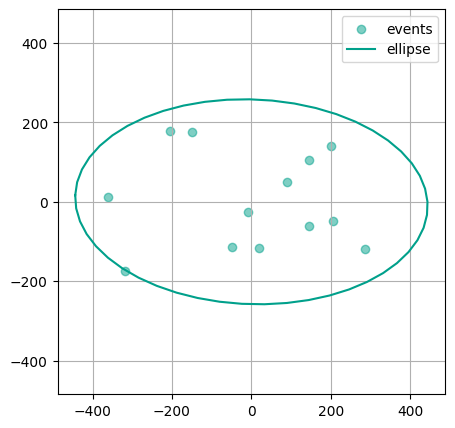

center of ellispe: [0.01984343 0.01243128] 
axis: [443.9537807  257.78349251] 
rotation 177.86514096160198 
GMT angle -87.86514096160198
main eigenvector -0.2419017539407368 0.9703007479335441


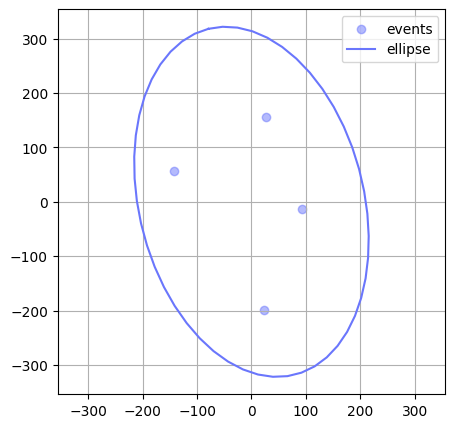

center of ellispe: [-0.02914624  0.03614147] 
axis: [327.69883475 206.66358575] 
rotation 103.9988106419192 
GMT angle -13.998810641919194
main eigenvector -0.9996320734421724 -0.02712411741796163


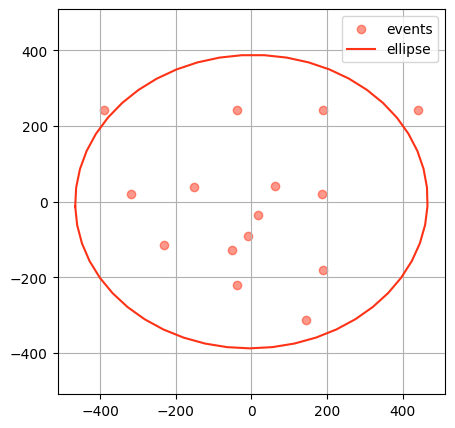

center of ellispe: [-0.04400871  0.07658151] 
axis: [466.10809563 387.95021351] 
rotation -178.44571192297013 
GMT angle -91.55428807702991
main eigenvector 0.5129050952984061 0.8584453175461634


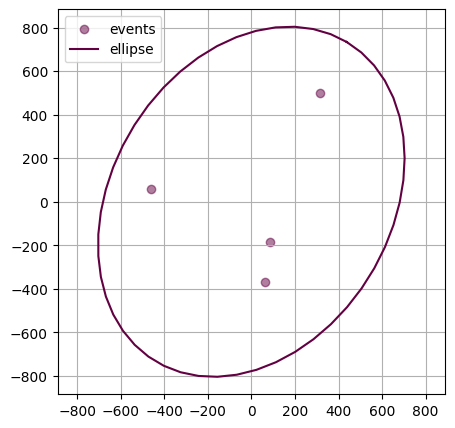

center of ellispe: [-0.3374663   0.15380825] 
axis: [854.494895   641.68354032] 
rotation 59.142468836223976 
GMT angle 30.857531163776024
main eigenvector -0.8554391473457832 0.5179033357570884


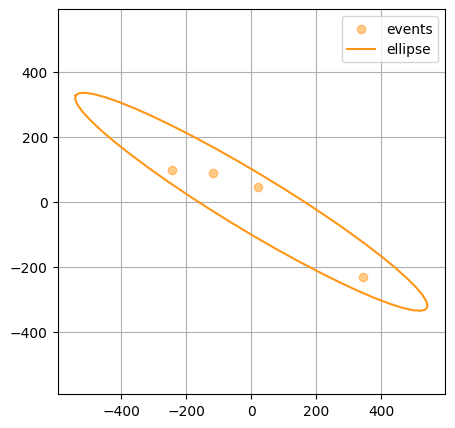

center of ellispe: [-0.04274845 -0.00729342] 
axis: [631.54032237  86.71032972] 
rotation 148.8082837995212 
GMT angle -58.8082837995212
main eigenvector 0.37243787917764976 0.928057124402186


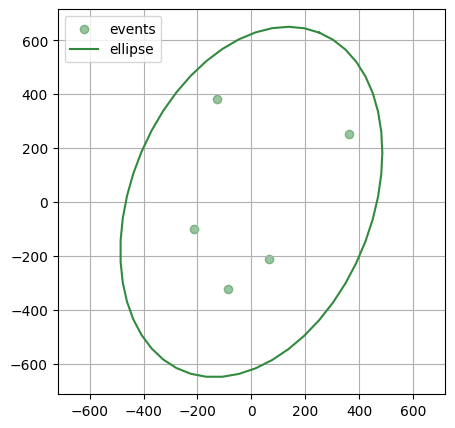

center of ellispe: [0.0409772  0.06859735] 
axis: [677.46113749 448.16601491] 
rotation 68.13395361317708 
GMT angle 21.866046386822916
main eigenvector -0.9699356916091916 0.24336136534503383


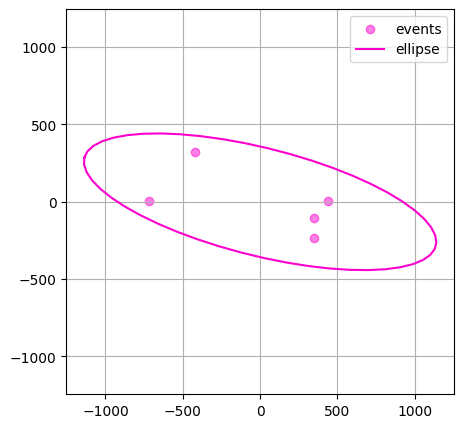

center of ellispe: [ 0.02204866 -0.01485925] 
axis: [1172.09495057  348.3347642 ] 
rotation 165.91498382589438 
GMT angle -75.91498382589438


In [52]:
import numpy as np
from scipy.stats import chi2

def fit_ellipse_2d(points, confidence_level=0.95):
    """
    Trova l'ellisse che meglio approssima una distribuzione di punti 2D.
    
    Parameters:
    points: numpy.ndarray di shape (n, 2) contenente le coordinate (x,y) dei punti
    confidence_level: livello di confidenza per la dimensione dell'ellisse (default 0.95)
    
    Returns:
    center: centro dell'ellisse (array 2D)
    radii: lunghezza dei semiassi dell'ellisse
    rotation: angolo di rotazione dell'ellisse in radianti
    """
    # Calcola il centro come media dei punti
    center = np.mean(points, axis=0)
    
    # Centra i punti sottraendo la media
    centered_points = points - center
    
    # Calcola la matrice di covarianza
    cov_matrix = np.cov(centered_points, rowvar=False)
    
    # Calcola autovalori e autovettori
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Ordina autovalori e autovettori in ordine decrescente
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Calcola i semiassi dell'ellisse
    chi2_val = chi2.ppf(confidence_level, df=2)
    radii = np.sqrt(eigenvalues * chi2_val)

    # Calcola l'angolo di rotazione dal primo autovettore
    rotation = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])       # arctan( y/x )
    x_main_axis=eigenvectors[0, 0]
    y_main_axis=eigenvectors[1, 0]
    print('main eigenvector',x_main_axis,y_main_axis)

    return center, radii, rotation , x_main_axis ,y_main_axis

def generate_ellipse_points(center, radii, rotation, n_points=50):
    """
    Genera i punti per disegnare l'ellisse.
    
    Parameters:
    center: centro dell'ellisse
    radii: lunghezza dei semiassi
    rotation: angolo di rotazione in radianti
    n_points: numero di punti per disegnare l'ellisse
    
    Returns:
    x, y: array delle coordinate x e y dei punti dell'ellisse
    """
    # Genera punti per un cerchio
    theta = np.linspace(0, 2*np.pi, n_points)
    
    # Crea l'ellisse
    x = radii[0] * np.cos(theta)
    y = radii[1] * np.sin(theta)
    
    # Crea la matrice di rotazione
    rot_matrix = np.array([
        [np.cos(rotation), -np.sin(rotation)],
        [np.sin(rotation), np.cos(rotation)]
    ])
    
    # Applica rotazione e traslazione
    points = np.dot(rot_matrix, np.array([x, y]))
    x = points[0, :] + center[0]
    y = points[1, :] + center[1]
    
    return x, y
ellipse_res=[]
for i in range(len(x_cls)):
    points=np.zeros((len(x_cls[i]), 2))
    points[:,0]=np.array(x_cls[i]).flatten()
    points[:,1]=np.array(y_cls[i]).flatten()

    center, radii, rotation ,x_main_axis ,y_main_axis = fit_ellipse_2d(points,confidence_level=0.90)    #VT : 0.90

    x_ellipse, y_ellipse = generate_ellipse_points(center, radii, rotation)

    plt.figure(figsize=(5, 5))
    plt.scatter(points[:,0], points[:,1], c=cls_colors[i], alpha=0.5, label='events')
    plt.plot(x_ellipse, y_ellipse, cls_colors[i], label='ellipse')
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

    rotation_angle= rotation * 180 / np.pi
    
    GMT_angle=np.arctan2(x_main_axis,y_main_axis) * 180 / np.pi

    ellipse_res.append( (center,radii,rotation_angle, GMT_angle) )

    print(f'center of ellispe: {center} \naxis: {radii} \nrotation {rotation_angle} \nGMT angle {GMT_angle}')

    

In [53]:
#DO ONE TIME TO CONVERT ANGLES
for i in range(len(ellipse_res)):
    print('angle before: ',ellipse_res[i][3])
    ellipse_res[i]=list(ellipse_res[i])

    if -180<=ellipse_res[i][3]<0:
        ellipse_res[i][3]+= 360
    elif 0<=ellipse_res[i][3]<=180:
        ellipse_res[i][3]+=0
    else:
        print('WARNING: check angles values')
    print('angle after:',ellipse_res[i][3])

#ellipse centre coordinates
new_cls_lat=[]
new_cls_lon=[]
for i in range(len(cls_lat_mean)):
    new_lat,new_lon = orthodrome.ne_to_latlon(cls_lat_mean[i],cls_lon_mean[i],ellipse_res[i][0][1],ellipse_res[i][0][0])
    new_cls_lat.append(new_lat)
    new_cls_lon.append(new_lon)

angle before:  -87.86514096160198
angle after: 272.134859038398
angle before:  -13.998810641919194
angle after: 346.0011893580808
angle before:  -91.55428807702991
angle after: 268.4457119229701
angle before:  30.857531163776024
angle after: 30.857531163776024
angle before:  -58.8082837995212
angle after: 301.1917162004788
angle before:  21.866046386822916
angle after: 21.866046386822916
angle before:  -75.91498382589438
angle after: 284.0850161741056


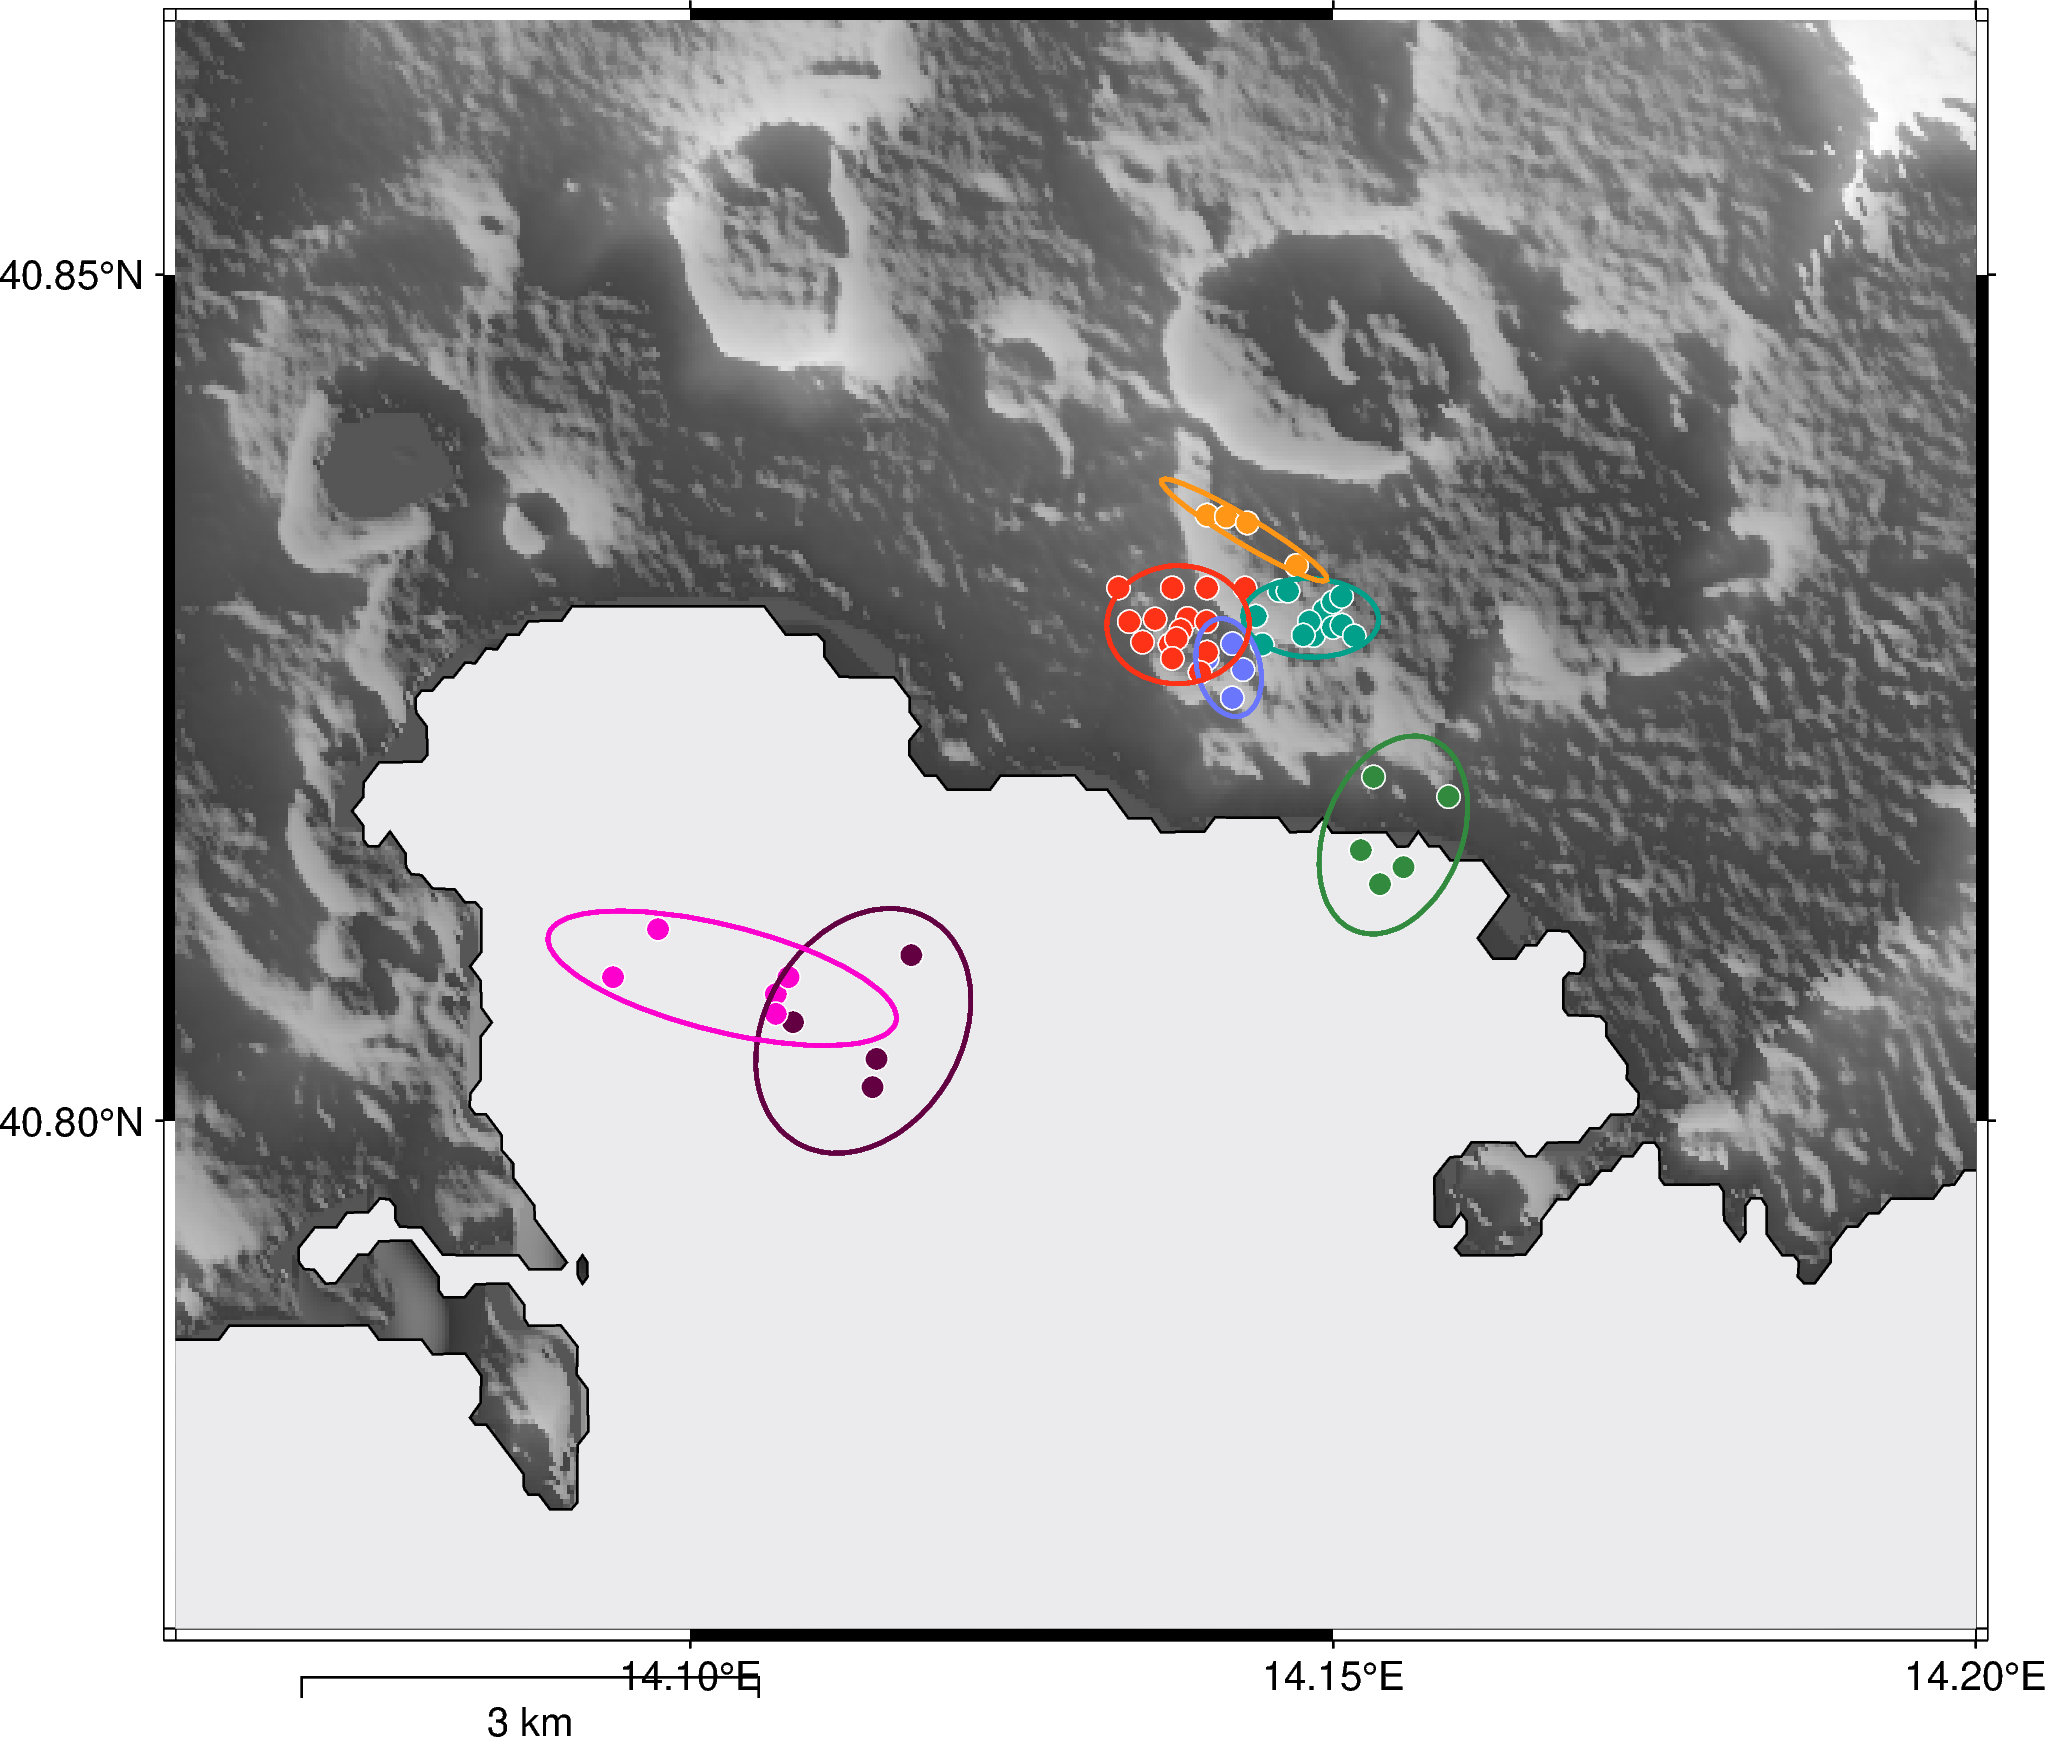

In [56]:
switch_create_fig=False
#   CREATE FIGURE
minlon=14.06
maxlon=14.20
minlat=40.77
maxlat=40.865

fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.xxF")

# Define the region around the center coordinates (a smaller box for higher resolution)
region = [minlon, maxlon, minlat, maxlat]

# Define the projection
projection = "M6i"  # Mercator projection with a 6-inch width

fig.basemap(region=region,projection=projection, frame='a0.05', map_scale='x3c/-0.5c+w3k+lkm')
# Load high-resolution topography data (1 arc-second resolution)
topo_data = pygmt.datasets.load_earth_relief(resolution="01s", region=region)

# Plot the topography with shading
fig.grdimage(grid=topo_data, region=region, projection=projection, shading="+a45+ne0.5", cmap="gray")
# Plot coastlines with high resolution
fig.coast(shorelines="1/0.5p,black", resolution="f", water="#EBEBEE")

#fig.plot(x=new_cls_lon[:], y=new_cls_lat[:], style="c0.2c", fill="#BD2025", pen="#BD2025", label='centre cluster') # red filling
for i in range(len(cls_lat_all)):
    fig.plot(x=cls_lon_all[i][:], y=cls_lat_all[i][:], style="c0.2c",fill=cls_colors[i],  pen="white")

ellipses_txt=[]
for i in range(len(cls_depth_mean)):
    fig.plot(
        x=[new_cls_lon[i]],
        y=[new_cls_lat[i]],
        pen=f"1p,{cls_colors[i]}",
        style = f'E{ellipse_res[i][3]}/{ellipse_res[i][1][0]*0.002}/{ellipse_res[i][1][1]*0.002}'       # x0.001 to convert m in KM
                                                                                                        # x2 because of semiaxis conversion
        #style= 'E10/3/0.5'
        )
    ellipses_txt.append(str(cls_colors[i])+','+str(new_cls_lat[i])+','+str(new_cls_lon[i])+','+str(ellipse_res[i][1][0]*0.001)
                        +','+str(ellipse_res[i][1][1]*0.001)+','+str(ellipse_res[i][3]))
fig.show()
if switch_create_fig:
    if switch_VT:
        fig.savefig('../PLOTS/MAPS_ELLIPSES/ellipses_VT.pdf')
    else:
        fig.savefig('../PLOTS/MAPS_ELLIPSES/ellipses_VLP.pdf')

In [55]:
switch_create_txt_ellipses=False

if switch_create_txt_ellipses:

    if switch_VT:
        workdir='../'
        catdir=os.path.join(workdir,'CAT')
        catdir=os.path.join(catdir,'ellipses_txt')

        for i,key in enumerate(cls):
            filename='ellipse_cluster'+str(key)               #CHANGE
            catname=os.path.join(catdir,filename+'.txt')
            with open(catname, 'w') as output:
                output.write('name_color,lat,lon,major_axis,minor_axis,azimuth\n')  
                output.write(str(ellipses_txt[i]))

    else:
        workdir='../'
        catdir=os.path.join(workdir,'CAT')
        catdir=os.path.join(catdir,'ellipses_txt')


        filename='ellipse_cluster_VLP'               #CHANGE
        catname=os.path.join(catdir,filename+'.txt')
        with open(catname, 'w') as output:
            output.write('name_color,lat,lon,major_axis,minor_axis,azimuth\n')  
            output.write(str(ellipses_txt[0]))